# Customer Life time Value prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn


#Load Data

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')
pd.set_option('display.max_columns',None)
df.head()

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [4]:
df.shape

(9134, 24)

24 columns and 9134 observations

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

There are no missing values

In [7]:
df.dtypes.value_counts()

object     16
int64       6
float64     2
dtype: int64

In this Dataset customer Lifetime Value is the target variable.

Customer Lifetime Value is defined as, “The total value of direct and indirect contributions to overhead and profit by an individual customer during the entire customer lifecycle that is - from the start of the relationship until its projected ending”.

CLV evaluates the long-term value of customers with the company.

It is a powerful measure used not only to determine which clients have the most potential, but also to decide how much marketing expenditures is justified for each segment.**

# Analyzing Target Variable

In [8]:
df1 = df.copy(deep = True)
df['Customer Lifetime Value'].describeibe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

mu = 8004.94 and sigma = 6870.59


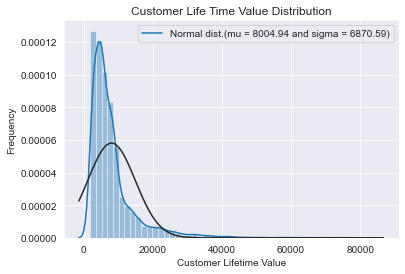

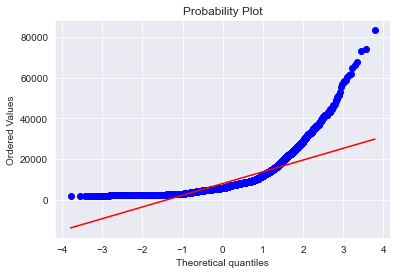

In [9]:
# Distplot

from scipy import stats
from scipy.stats import norm,skew

sns.distplot(df1['Customer Lifetime Value'],fit=norm)

(mu,sigma) = norm.fit(df1['Customer Lifetime Value'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(df1['Customer Lifetime Value'],plot = plt)
plt.show()

The distribution plot indicates that the target variable is right skewed with a skewness of 3.03.

Indicates presence of outliers.

So it is important to transform it before applying linear models. I have applied log transformation on the target variable.

mu = 8.75 and sigma = 0.65


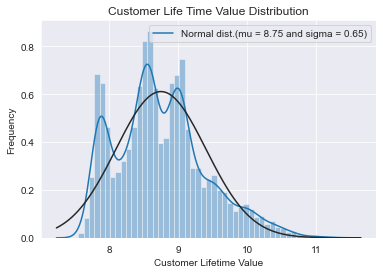

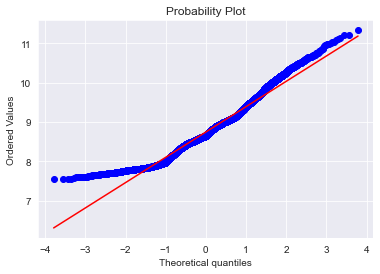

In [10]:
df1['Customer Lifetime Value'] = np.log1p(df1['Customer Lifetime Value'])
sns.distplot(df1['Customer Lifetime Value'],fit=norm)

(mu,sigma) = norm.fit(df1['Customer Lifetime Value'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu,sigma))

plt.legend(['Normal dist.(mu = {:.2f} and sigma = {:.2f})'.format(mu,sigma)],loc = 'best')
plt.ylabel('Frequency')
plt.title('Customer Life Time Value Distribution')

## Q-Q PLOT
fig = plt.figure()
res = stats.probplot(df1['Customer Lifetime Value'],plot = plt)
plt.show()

In [11]:
print('skewness before transformation:',df['Customer Lifetime Value'].skew())
print('skewness after transformation:',df1['Customer Lifetime Value'].skew())

skewness before transformation: 3.032280259929985
skewness after transformation: 0.5761717967456804


In [12]:
df1 = df1.drop(['Customer','Customer Lifetime Value','Effective To Date'],axis = 1)
df_cat1 = df1.select_dtypes(include = ['object'])
df_cat1.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'],
      dtype='object')

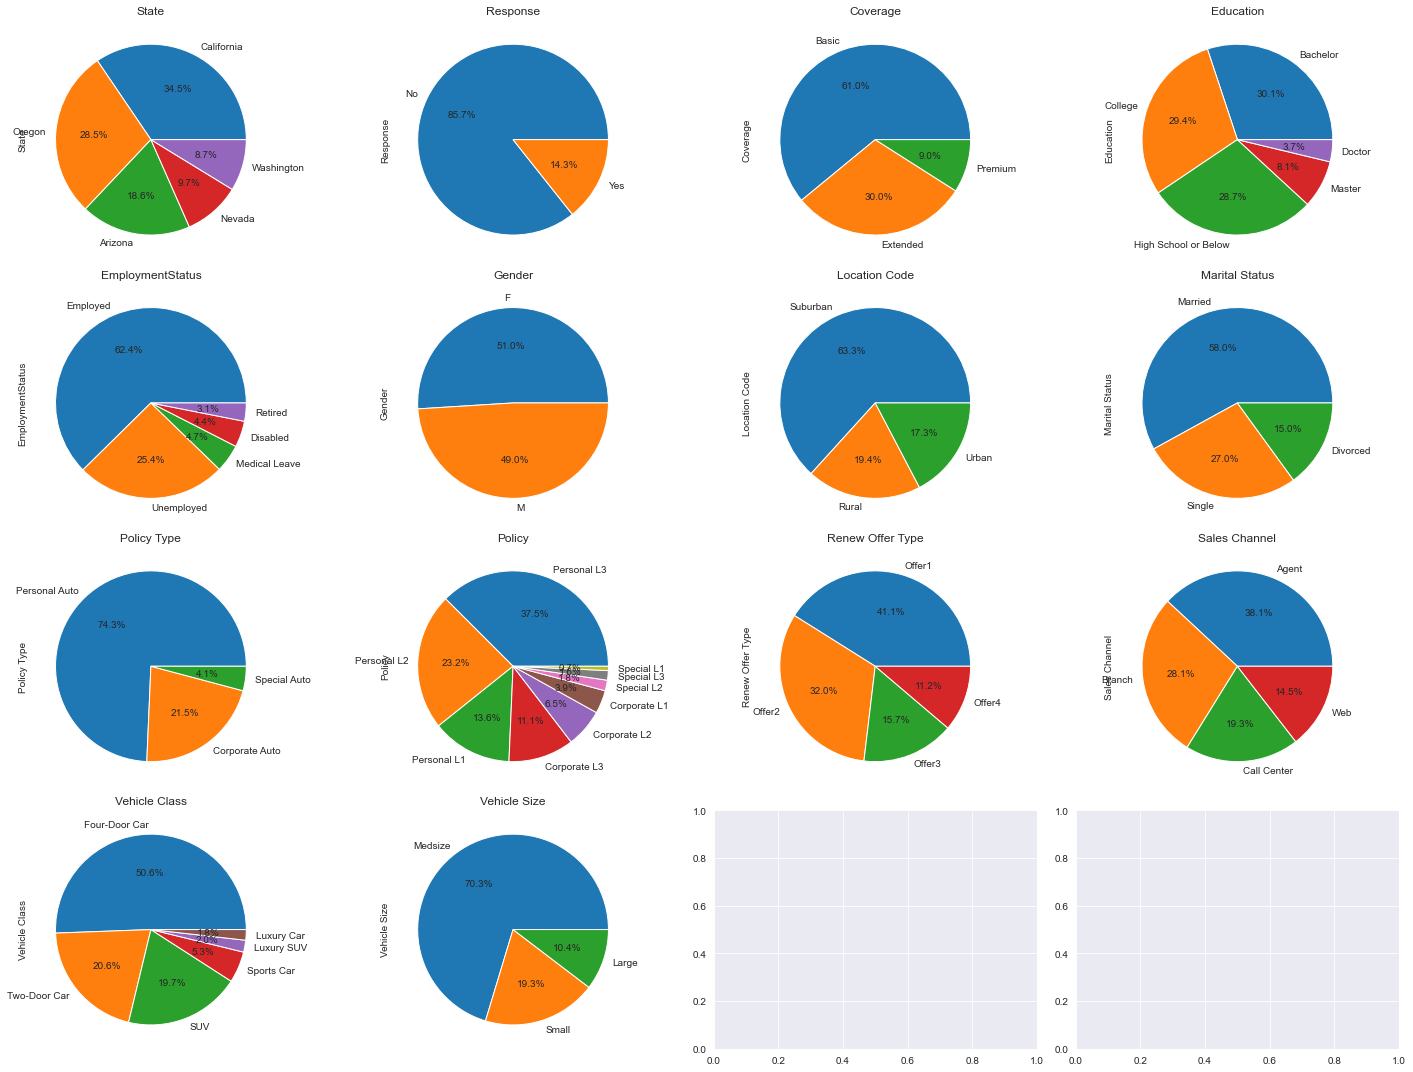

In [13]:
fig, axes = plt.subplots(round(len(df_cat1.columns) / 4), 4, figsize=(20, 15))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat1.columns):
        df[df_cat1.columns[i]].value_counts().plot.pie(autopct = '%1.1f%%',ax = ax)
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        ax.set_title(df_cat1.columns[i])

fig.tight_layout()

The pie charts show the percentage of customers in each category of the categorical variables

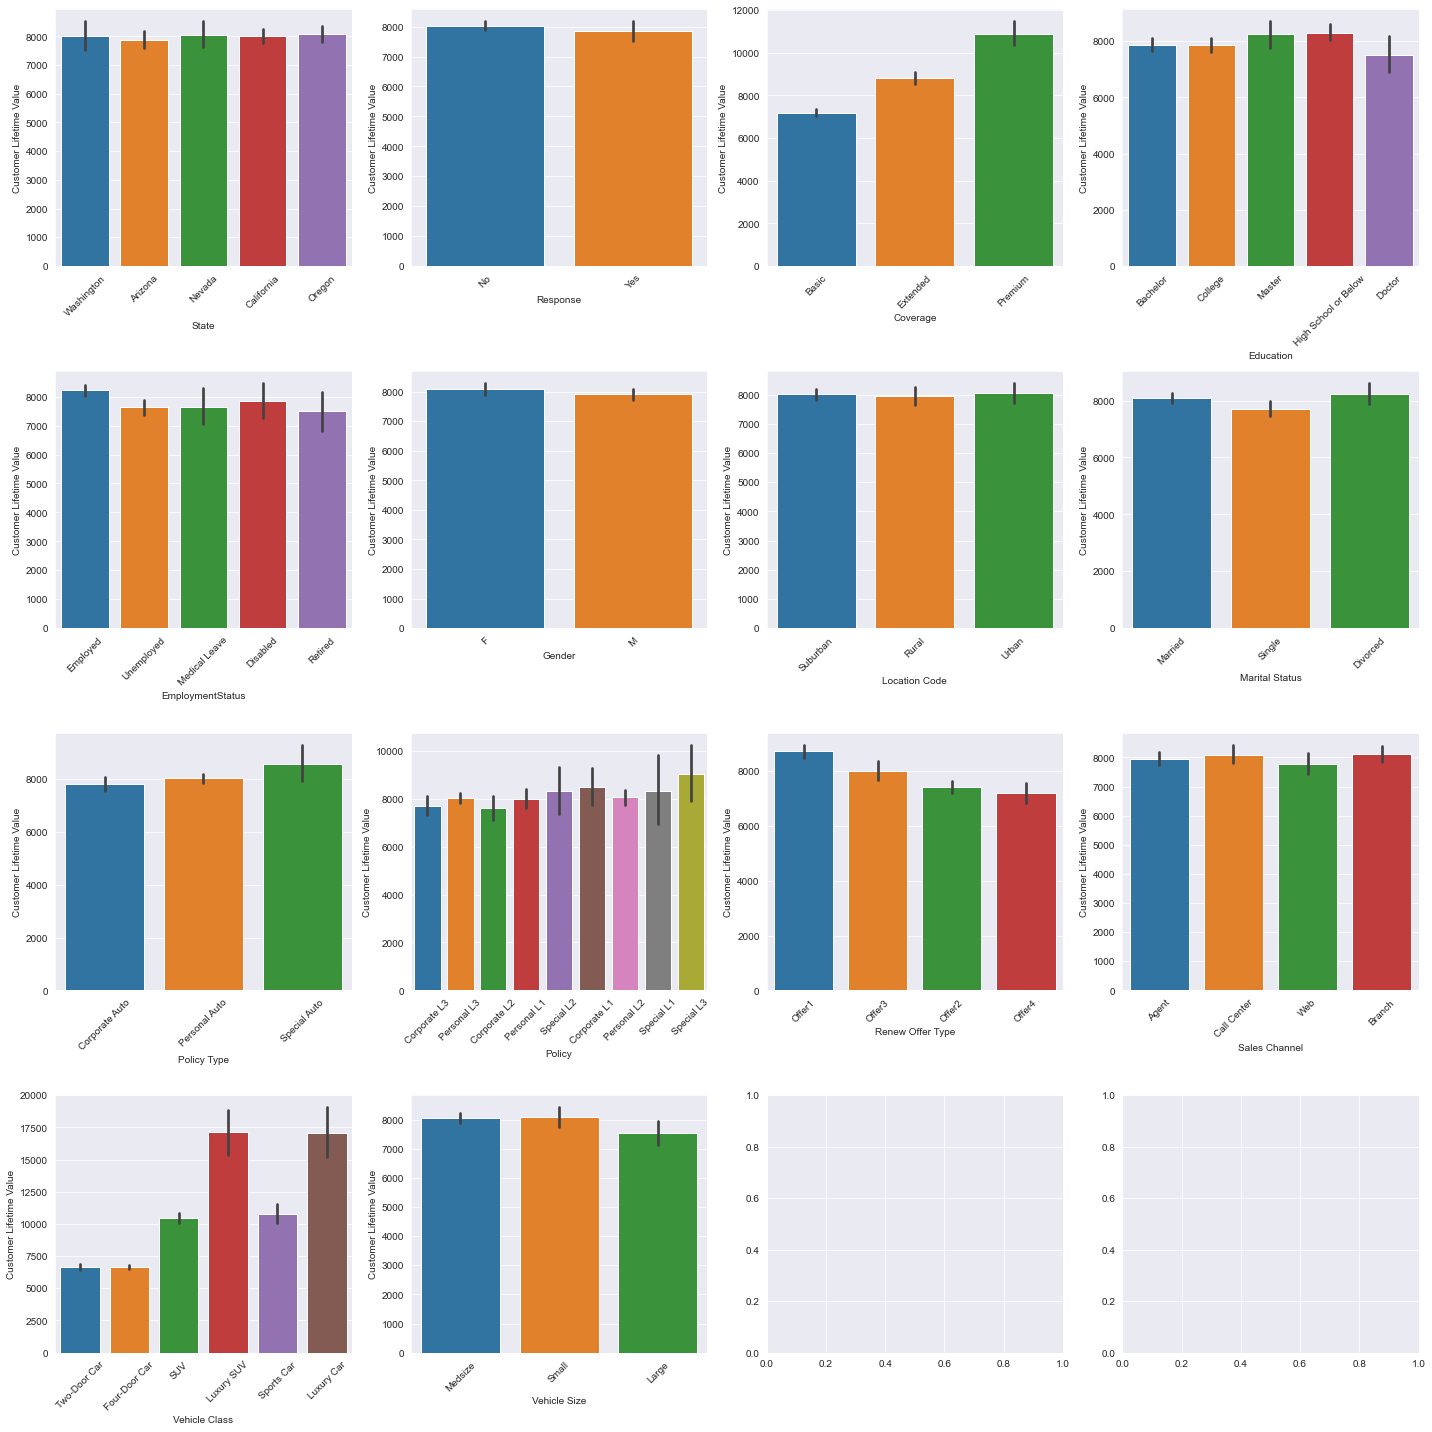

In [16]:
fig, axes = plt.subplots(round(len(df_cat1.columns) / 4), 4, figsize=(20, 20))

for i, ax in enumerate(fig.axes):
    if i < len(df_cat1.columns):
        sns.barplot(x = df[df_cat1.columns[i]],y = df['Customer Lifetime Value'],data = df, ax = ax )
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)

fig.tight_layout()

The bar charts show the average customer life time value of each categories in the Categorical features. 
From the bar chart itself we can observe that some of the features are insignificant like Response, 
Location code, Gender because the average customer lifetime value under each categories of these features are almost same.

In [17]:
df_num = df.select_dtypes(include=['int64','float'])
df_num.columns

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')

In [18]:
df_num_corr = df_num.corr()['Customer Lifetime Value'].sort_values(ascending=False)
df_num_corr

Customer Lifetime Value          1.000000
Monthly Premium Auto             0.396262
Total Claim Amount               0.226451
Income                           0.024366
Number of Policies               0.021955
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Number of Open Complaints       -0.036343
Name: Customer Lifetime Value, dtype: float64

<AxesSubplot:>

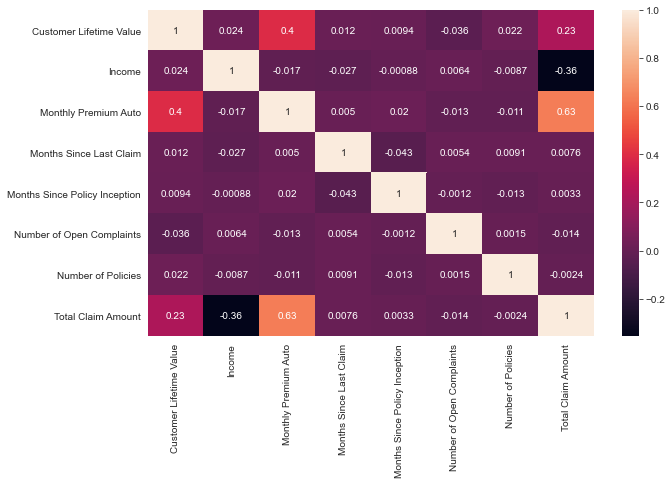

In [19]:
plt.figure(figsize=(10,6))
sns.heatmap(df_num.corr(),annot = True)

In [ ]:
1. None of the features are strongly correlated with the target variable (Customer Life time Value).

2. As compared to other variables the highest correlation of target variable is observed with Monthly premium Auto. It is 0.4 which indicates a weak positive correlation.

3. The highest correlation can be seen between two independent variables - Monthly premium auto and total claim amount, which is equal to 0.63.

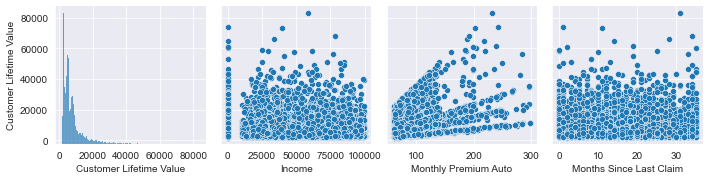

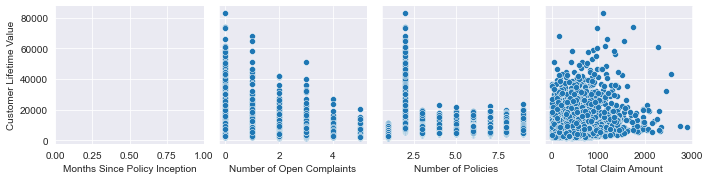

In [20]:
for i in range(0, len(df_num.columns), 4):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+4],
                y_vars=['Customer Lifetime Value'])

1. It is important that the independent features that we are using for the prediction of target variable should be strongly correlated with the target variable.

2. There is no linear relationship between continuous independent features and CLV.

3. Linear models would not work well for the given dataset, so we may have to choose non-linear models for better prediction.

# Data Preprocessing

In [22]:
y = df['Customer Lifetime Value']
df1.head()

State Response  Coverage Education EmploymentStatus Gender  Income  \
0  Washington       No     Basic  Bachelor         Employed      F   56274   
1     Arizona       No  Extended  Bachelor       Unemployed      F       0   
2      Nevada       No   Premium  Bachelor         Employed      F   48767   
3  California       No     Basic  Bachelor       Unemployed      M       0   
4  Washington       No     Basic  Bachelor         Employed      M   43836   

  Location Code Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0      Suburban        Married                    69                       32   
1      Suburban         Single                    94                       13   
2      Suburban        Married                   108                       18   
3      Suburban        Married                   106                       18   
4         Rural         Single                    73                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

In [23]:
df1 = pd.get_dummies(df1,drop_first=True)
df1.shape

(9134, 50)

In [24]:
num_features = df.dtypes[df.dtypes != 'object'].index
skewed_feat = df[num_features].apply(lambda x: x.skew()).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feat,columns = ['skew'])
skewness

skew
Customer Lifetime Value        3.032280
Number of Open Complaints      2.783263
Monthly Premium Auto           2.123546
Total Claim Amount             1.714966
Number of Policies             1.253333
Income                         0.286887
Months Since Last Claim        0.278586
Months Since Policy Inception  0.040165

It is important to transform the skewed features before applying linear models.

In [25]:
from scipy.special import boxcox1p
skewness_feat = ['Monthly Premium Auto','Total Claim Amount']
lam = 0.15
for i in skewness_feat:
    df1[i] = boxcox1p(df1[i],lam)

# Modelling

Let's start with the base linear model without doing any transformation and feature elimination and check the score of R2

In [26]:
import statsmodels.api as sm
Xc = sm.add_constant(df1)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.170
Model:                                 OLS   Adj. R-squared:                  0.166
Method:                      Least Squares   F-statistic:                     38.85
Date:                     Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                             11:22:18   Log-Likelihood:                -92807.
No. Observations:                     9134   AIC:                         1.857e+05
Df Residuals:                         9085   BIC:                         1.861e+05
Df Model:                               48                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -1.777e+04   3201.327     -5.550      0.000    -2.4e+04   -1.15e+04
Income                            -0.0016      0.004     -0.420      0.674      -0.009       0.006
Monthly Premium Auto            3958.6659    540.617      7.322      0.000    2898.934    5018.397
Months Since Last Claim            7.5271      6.549      1.149      0.250      -5.310      20.364
Months Since Policy Inception     -1.3830      2.379     -0.581      0.561      -6.046       3.280
Number of Open Complaints       -262.4445     72.453     -3.622      0.000    -404.469    -120.420
Number of Policies                55.5714     27.743      2.003      0.045       1.190     109.953
Total Claim Amount                88.8594     76.812      1.157      0.247     -61.710     239.429
State_California                  30.3018    189.330      0.160      0.873    -340.827     401.430
State_Nevada                      23.8488    261.033      0.091      0.927    -487.835     535.532
State_Oregon                      91.0956    195.944      0.465      0.642    -292.999     475.190
State_Washington                 182.9220    269.817      0.678      0.498    -345.980     711.824
Response_Yes                    -179.7431    207.128     -0.868      0.386    -585.761     226.275
Coverage_Extended               -284.1983    281.746     -1.009      0.313    -836.484     268.087
Coverage_Premium                -371.4872    544.803     -0.682      0.495   -1439.424     696.450
Education_College                 -9.0076    171.144     -0.053      0.958    -344.488     326.473
Education_Doctor                -167.2398    362.753     -0.461      0.645    -878.317     543.837
Education_High School or Below   367.0768    173.235      2.119      0.034      27.498     706.656
Education_Master                 156.6972    262.718      0.596      0.551    -358.289     671.683
EmploymentStatus_Employed        708.3178    354.255      1.999      0.046      13.899    1402.737
EmploymentStatus_Medical Leave   173.8684    435.917      0.399      0.690    -680.627    1028.363
EmploymentStatus_Retired          93.1548    502.482      0.185      0.853    -891.822    1078.132
EmploymentStatus_Unemployed      -56.9328    356.783     -0.160      0.873    -756.308     642.443
Gender_M                        -168.8049    132.832     -1.271      0.204    -429.186      91.577
Location Code_Suburban          -487.0965    345.427     -1.410      0.159   -1164.212     190.019
Location Code_Urban             -167.4939    305.340     -0.549      0.583    -766.029     431.041
Marital Status_Married          -181.6439    194.638     -0.933      0.351    -563.177     199.890
Marital Status_Single           -531.4468    224.505     -

We got a very low r2 value of 0.170, 
it proves that our conclusion from the scatterplot that the linear model will not work well for this dataset is true

Let's check the score after transforming target variable

In [28]:
y_transformed = np.log1p(y)
model2 = sm.OLS(y_transformed,Xc).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.269
Model:                                 OLS   Adj. R-squared:                  0.265
Method:                      Least Squares   F-statistic:                     69.58
Date:                     Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                             11:25:40   Log-Likelihood:                -7635.1
No. Observations:                     9134   AIC:                         1.537e+04
Df Residuals:                         9085   BIC:                         1.572e+04
Df Model:                               48                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              5.1082      0.286     17.890      0.000       4.548       5.668
Income                           2.17e-07   3.44e-07      0.631      0.528   -4.58e-07    8.91e-07
Monthly Premium Auto               0.5500      0.048     11.407      0.000       0.456       0.645
Months Since Last Claim            0.0005      0.001      0.865      0.387      -0.001       0.002
Months Since Policy Inception     -0.0003      0.000     -1.484      0.138      -0.001       0.000
Number of Open Complaints         -0.0315      0.006     -4.876      0.000      -0.044      -0.019
Number of Policies                 0.0526      0.002     21.258      0.000       0.048       0.057
Total Claim Amount                 0.0070      0.007      1.019      0.308      -0.006       0.020
State_California                   0.0103      0.017      0.607      0.544      -0.023       0.043
State_Nevada                       0.0035      0.023      0.150      0.880      -0.042       0.049
State_Oregon                       0.0139      0.017      0.798      0.425      -0.020       0.048
State_Washington                  -0.0043      0.024     -0.179      0.858      -0.051       0.043
Response_Yes                      -0.0092      0.018     -0.496      0.620      -0.045       0.027
Coverage_Extended                 -0.0396      0.025     -1.577      0.115      -0.089       0.010
Coverage_Premium                  -0.0863      0.049     -1.776      0.076      -0.182       0.009
Education_College                  0.0058      0.015      0.377      0.706      -0.024       0.036
Education_Doctor                  -0.0269      0.032     -0.832      0.406      -0.090       0.037
Education_High School or Below     0.0378      0.015      2.448      0.014       0.008       0.068
Education_Master                   0.0168      0.023      0.715      0.475      -0.029       0.063
EmploymentStatus_Employed          0.0576      0.032      1.823      0.068      -0.004       0.120
EmploymentStatus_Medical Leave    -0.0108      0.039     -0.278      0.781      -0.087       0.065
EmploymentStatus_Retired        3.587e-05      0.045      0.001      0.999      -0.088       0.088
EmploymentStatus_Unemployed       -0.0208      0.032     -0.655      0.512      -0.083       0.042
Gender_M                          -0.0120      0.012     -1.013      0.311      -0.035       0.011
Location Code_Suburban            -0.0446      0.031     -1.447      0.148      -0.105       0.016
Location Code_Urban               -0.0149      0.027     -0.548      0.584      -0.068       0.038
Marital Status_Married            -0.0068      0.017     -0.393      0.695      -0.041       0.027
Marital Status_Single             -0.0547      0.020     -

The r2 value increased by just 10%

Let's apply ols model after applying polynomial features. 
Among the continuous features that we have 'Total Claim Amount','Monthly Premium Auto' 
are the only features which are heteroscedastic in nature. So we will be using these features for polynomial regression.¶

In [29]:
X_up = df1[['Total Claim Amount','Monthly Premium Auto']]
from sklearn.preprocessing import PolynomialFeatures
qr = PolynomialFeatures(degree = 3)
x_qr = qr.fit_transform(X_up)
x_main = pd.DataFrame(x_qr)
x_main.head()

0          1         2           3          4          5            6  \
0  1.0   9.621228  5.942124   92.568032  57.170534  35.308842   890.618152   
1  1.0  12.476442  6.533131  155.661595  81.510230  42.681804  1942.102798   
2  1.0  10.591730  6.808145  112.184735  72.110034  46.350843  1188.230367   
3  1.0  10.420040  6.770766  108.577231  70.551654  45.843275  1131.379075   
4  1.0   7.310601  6.047664   53.444881  44.212056  36.574239   390.714183   

             7           8           9  
0   550.050755  339.714424  209.809530  
1  1016.957627  532.517031  278.845825  
2   763.769981  490.935596  315.563279  
3   735.151045  477.688753  310.394097  
4   323.216680  267.379652  221.188703

In [30]:
df2= pd.concat([df1,x_main.iloc[:,3:]],axis = 1)
df2.head()

Income  Monthly Premium Auto  Months Since Last Claim  \
0   56274              5.942124                       32   
1       0              6.533131                       13   
2   48767              6.808145                       18   
3       0              6.770766                       18   
4   43836              6.047664                       12   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   Number of Policies  Total Claim Amount  State_California  State_Nevada  \
0                   1            9.621228                 0             0   
1                   8           12.476442                 0             0   
2                   2           10.591730                 0             1   
3                   7           10.420040                 1             0   
4                   1            7.310601                 0             0   

   State_Oregon  State_Washington  Response_Yes  Coverage_Extended  \
0             0                 1             0                  0   
1             0                 0             0                  1   
2             0                 0             0                  0   
3             0                 0             0                  0   
4             0                 1             0                  0   

   Coverage_Premium  Education_College  Education_Doctor  \
0                 0                  0                 0   
1                 0                  0                 0   
2                 1                  0                 0   
3                 0                  0                 0   
4                 0                  0                 0   

   Education_High School or Below  Education_Master  \
0                               0                 0   
1                               0                 0   
2                               0                 0   
3                               0                 0   
4                               0                 0   

   EmploymentStatus_Employed  EmploymentStatus_Medical Leave  \
0                          1                               0   
1                          0                               0   
2                          1                               0   
3                          0                               0   
4                          1                               0   

   EmploymentStatus_Retired  EmploymentStatus_Unemployed  Gender_M  \
0                         0                            0         0   
1                         0                            1         0   
2                         0                            0         0   
3                         0                            1         1   
4                         0                            0         1   

   Location Code_Suburban  Location Code_Urban  Marital Status_Married  \
0                       1                    0                       1   
1                       1                    0                       0   
2                       1                    0                       1   
3                       1                    0                       1   
4                       0                    0                       0   

   Marital Status_Single  Policy Type_Personal Auto  Policy Type_Special Auto  \
0                      0                          0                         0   
1                      1                          1                         0   
2                      0                          1                         0   
3                      0                          0                         0   
4                      1       

In [31]:
Xc = sm.add_constant(df2)
model3 = sm.OLS(y_transformed,Xc).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer Lifetime Value   R-squared:                       0.270
Model:                                 OLS   Adj. R-squared:                  0.266
Method:                      Least Squares   F-statistic:                     61.04
Date:                     Sun, 13 Mar 2022   Prob (F-statistic):               0.00
Time:                             11:58:23   Log-Likelihood:                -7627.7
No. Observations:                     9134   AIC:                         1.537e+04
Df Residuals:                         9078   BIC:                         1.577e+04
Df Model:                               55                                         
Covariance Type:                 nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.2687      5.437     -0.417      0.676     -12.926       8.388
Income                          1.926e-07   3.44e-07      0.559      0.576   -4.83e-07    8.68e-07
Monthly Premium Auto               3.2337      2.437      1.327      0.185      -1.543       8.011
Months Since Last Claim            0.0006      0.001      0.951      0.342      -0.001       0.002
Months Since Policy Inception     -0.0003      0.000     -1.467      0.142      -0.001       0.000
Number of Open Complaints         -0.0314      0.006     -4.853      0.000      -0.044      -0.019
Number of Policies                 0.0525      0.002     21.228      0.000       0.048       0.057
Total Claim Amount                 0.1831      0.315      0.582      0.560      -0.433       0.800
State_California                   0.0102      0.017      0.606      0.545      -0.023       0.043
State_Nevada                       0.0023      0.023      0.098      0.922      -0.043       0.048
State_Oregon                       0.0144      0.017      0.825      0.410      -0.020       0.049
State_Washington                  -0.0034      0.024     -0.142      0.887      -0.051       0.044
Response_Yes                      -0.0104      0.019     -0.563      0.574      -0.047       0.026
Coverage_Extended                 -0.0316      0.025     -1.246      0.213      -0.081       0.018
Coverage_Premium                  -0.0290      0.052     -0.557      0.577      -0.131       0.073
Education_College                  0.0052      0.015      0.338      0.735      -0.025       0.035
Education_Doctor                  -0.0251      0.032     -0.775      0.438      -0.089       0.038
Education_High School or Below     0.0368      0.015      2.378      0.017       0.006       0.067
Education_Master                   0.0168      0.023      0.717      0.474      -0.029       0.063
EmploymentStatus_Employed          0.0562      0.032      1.778      0.075      -0.006       0.118
EmploymentStatus_Medical Leave    -0.0115      0.039     -0.297      0.766      -0.088       0.065
EmploymentStatus_Retired          -0.0015      0.045     -0.033      0.974      -0.089       0.086
EmploymentStatus_Unemployed       -0.0212      0.032     -0.664      0.507      -0.084       0.041
Gender_M                          -0.0127      0.012     -1.075      0.283      -0.036       0.010
Location Code_Suburban            -0.0561      0.039     -1.439      0.150      -0.133       0.020
Location Code_Urban               -0.0270      0.033     -0.816      0.414      -0.092       0.038
Marital Status_Married            -0.0078      0.017     -0.452      0.652      -0.042       0.026
Marital Status_Single             -0.0534      0.020     -

There isn't any appreciable increase in r2.

So it's better to go for non linear models. I have splitted the dataset in 70:30 ratio.

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1,y_transformed,test_size = 0.3,random_state=4)

# Decision Tree Regressor

Hyperparameter tuning using Randomized search CV and best parameters are mentioned in the dt_tuned model.

In [40]:
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint as sp_randint
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()

params = {'max_depth': sp_randint(2,20),'min_samples_leaf': sp_randint(1,20), 'min_samples_split': sp_randint(2,40)}

rsearch = RandomizedSearchCV(dtc,param_distributions=params,n_iter=100,cv =10, scoring = 'r2')
rsearch.fit(df1,y)

RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_iter=100,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018E2A806370>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018E27F59850>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000018E2A806BE0>},
                   scoring='r2')

In [43]:
pip install xgboost

In [45]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [46]:
from sklearn.linear_model import Lasso,ElasticNet,LassoLarsIC,BayesianRidge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin,clone
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import mean_squared_error,r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.svm import SVR

In [42]:
dt = DecisionTreeRegressor()
dt_tuned = DecisionTreeRegressor(max_depth =  8, min_samples_leaf =  18, min_samples_split = 22)
dt_bag = BaggingRegressor(base_estimator=dt_tuned,n_estimators=10,random_state=0)
dt_boost = AdaBoostRegressor(base_estimator=dt_tuned,n_estimators=50,random_state=0)

In [47]:
for model,name in zip([dt,dt_tuned,dt_bag,dt_boost],['decision_tree','dt_tuned','dt_bag','dt_boost']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)
    print('*'*60)

model: decision_tree
train r2: 1.0
test r2: 0.8186503587149278
Mape: 1.2203125969751014
Adjusted R squared score is : 0.8152795475386253
************************************************************
model: dt_tuned
train r2: 0.9115762293682189
test r2: 0.8971375979823306
Mape: 1.1453877206442977
Adjusted R squared score is : 0.8952256574243813
************************************************************
model: dt_bag
train r2: 0.9151751401839358
test r2: 0.9014122984401167
Mape: 1.1308062235868195
Adjusted R squared score is : 0.8995798132810111
************************************************************
model: dt_boost
train r2: 0.9182209507008972
test r2: 0.8911816393117061
Mape: 1.3804705546973015
Adjusted R squared score is : 0.8891589932022583
************************************************************


In [48]:
X_imp=pd.DataFrame(dt_tuned.feature_importances_,columns=['Imp'],index=x_test.columns)
X_imp=X_imp.sort_values(by='Imp',ascending=False)
plt.figure(figsize=(250,50))
plt.xlabel('Feature Names',fontsize=80)
plt.xticks(rotation=90,fontsize=150)
sns.barplot(x=X_imp.index,y=X_imp['Imp'])
X_imp.T

Number of Policies  Monthly Premium Auto  Coverage_Extended   Income  \
Imp            0.739868              0.228167           0.014227  0.00498   

     EmploymentStatus_Employed  Total Claim Amount  Months Since Last Claim  \
Imp                   0.002795             0.00225                 0.001727   

     Response_Yes  Number of Open Complaints  Gender_M  Coverage_Premium  \
Imp      0.001182                   0.001042  0.000773          0.000639   

     Months Since Policy Inception  Education_Master  Marital Status_Single  \
Imp                       0.000623          0.000606               0.000316   

     Education_High School or Below  EmploymentStatus_Unemployed  \
Imp                        0.000309                     0.000216   

     Education_College  Marital Status_Married  Education_Doctor  \
Imp           0.000181                  0.0001               0.0   

     EmploymentStatus_Medical Leave  Vehicle Size_Medsize  \
Imp                             0.0                   0.0   

     Vehicle Class_Two-Door Car  Vehicle Class_Sports Car  Vehicle Class_SUV  \
Imp                         0.0                       0.0                0.0   

     Vehicle Class_Luxury SUV  Vehicle Class_Luxury Car  Sales Channel_Web  \
Imp                       0.0                       0.0                0.0   

     Sales Channel_Call Center  Sales Channel_Branch  Renew Offer Type_Offer4  \
Imp                        0.0                   0.0                      0.0   

     Renew Offer Type_Offer3  Renew Offer Type_Offer2  Policy_Special L3  \
Imp                      0.0                      0.0                0.0   

     Policy_Special L2  Policy_Special L1  Policy_Personal L3  \
Imp                0.0                0.0                 0.0   

     Policy_Personal L2  Policy_Personal L1  Policy_Corporate L3  \
Imp                 0.0                 0.0                  0.0   

     Policy_Corporate L2  Policy Type_Special Auto  Policy Type_Personal Auto  \
Imp                  0.0                       0.0                        0.0   

     State_California  State_Nevada  Location Code_Urban  \
Imp               0.0           0.0                  0.0   

     Location Code_Suburban  State_Oregon  State_Washington  \
Imp                     0.0           0.0               0.0   

     EmploymentStatus_Retired  Vehicle Size_Small  
Imp                       0.0                 0.0

# Random forest Regressor

In [49]:
rf = RandomForestRegressor()
rf_tuned = RandomForestRegressor(max_depth =  36,max_features = 25,min_samples_leaf = 2,min_samples_split = 7,n_estimators=432)

In [50]:
for model,name in zip([rf,rf_tuned],['Random Forest','Random Forest Tuned']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)
    print('*'*60)

model: Random Forest
train r2: 0.9874887370123051
test r2: 0.9107949812969878
Mape: 0.9760242140937786
Adjusted R squared score is : 0.9091368954474894
************************************************************
model: Random Forest Tuned
train r2: 0.9710998878131248
test r2: 0.9122244352384024
Mape: 0.9840501786752748
Adjusted R squared score is : 0.9105929191647667
************************************************************


In [51]:
X_imp=pd.DataFrame(rf_tuned.feature_importances_,columns=['Imp'],index=x_test.columns)
X_imp=X_imp.sort_values(by='Imp',ascending=False)
plt.figure(figsize=(250,50))
plt.xlabel('Feature Names',fontsize=80)
plt.xticks(rotation=90,fontsize=150)
sns.barplot(x=X_imp.index,y=X_imp['Imp'])
X_imp.T

Number of Policies  Monthly Premium Auto  Total Claim Amount  \
Imp            0.679166               0.18011            0.031808   

     Vehicle Class_SUV   Income  Months Since Policy Inception  \
Imp           0.015229  0.01154                       0.010045   

     Months Since Last Claim  Coverage_Extended  Vehicle Class_Luxury SUV  \
Imp                   0.0099           0.007498                   0.00588   

     Vehicle Class_Luxury Car  Coverage_Premium  Number of Open Complaints  \
Imp                   0.00499           0.00336                   0.002673   

     EmploymentStatus_Employed  Gender_M  Response_Yes  \
Imp                   0.002615   0.00199       0.00184   

     Vehicle Class_Sports Car  Marital Status_Married  \
Imp                  0.001761                0.001665   

     EmploymentStatus_Unemployed  Marital Status_Single  Education_College  \
Imp                     0.001554               0.001546            0.00152   

     Renew Offer Type_Offer2  Education_High School or Below  \
Imp                 0.001386                        0.001258   

     Sales Channel_Branch  Location Code_Suburban  Vehicle Class_Two-Door Car  \
Imp              0.001206                0.001131                    0.001107   

     Sales Channel_Call Center  State_Nevada  Renew Offer Type_Offer3  \
Imp                   0.001084      0.001002                 0.001002   

     Policy_Personal L3  Education_Master  Vehicle Size_Medsize  \
Imp            0.000971          0.000961              0.000948   

     State_California  Location Code_Urban  State_Oregon  Vehicle Size_Small  \
Imp          0.000933             0.000876      0.000869            0.000819   

     Policy Type_Personal Auto  EmploymentStatus_Medical Leave  \
Imp                   0.000803                        0.000802   

     Renew Offer Type_Offer4  State_Washington  Policy_Personal L2  \
Imp                 0.000764          0.000762            0.000757   

     Policy_Personal L1  Sales Channel_Web  EmploymentStatus_Retired  \
Imp            0.000713           0.000663                  0.000597   

     Policy_Corporate L3  Policy Type_Special Auto  Policy_Special L3  \
Imp             0.000548                  0.000402           0.000292   

     Policy_Corporate L2  Policy_Special L2  Education_Doctor  \
Imp             0.000288           0.000143          0.000138   

     Policy_Special L1  
Imp           0.000084

# GradientBoost

In [52]:
gboost = GradientBoostingRegressor(n_estimators=1000)

In [53]:
for model,name in zip([gboost],['Gradient Boost']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)

model: Gradient Boost
train r2: 0.9556863993272798
test r2: 0.9035328584242802
Mape: 1.2812215127488427
Adjusted R squared score is : 0.9017397888782631


# Light GBM Regressor

In [54]:
model_lgb = lgb.LGBMRegressor()
model_lgb_tuned = lgb.LGBMRegressor(n_estimators=43)

In [55]:
for model,name in zip([model_lgb,model_lgb_tuned],['Light GBM','Light GBM Tuned']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)
    print('*'*60)

model: Light GBM
train r2: 0.9604931269581568
test r2: 0.9075251907728779
Mape: 1.020023255671588
Adjusted R squared score is : 0.9058063281478383
************************************************************
model: Light GBM Tuned
train r2: 0.9412921568609087
test r2: 0.906781519244387
Mape: 1.056890060298139
Adjusted R squared score is : 0.9050488337284834
************************************************************


# XGBoost Regressor

In [56]:
model_xgb = xgb.XGBRegressor()
model_xgb_tuned = xgb.XGBRegressor(learning_rate = 0.1,max_depth= 6,min_child_weight= 4,n_estimators= 70)

In [57]:
for model,name in zip([model_xgb,model_xgb_tuned],['XG Boost','XG Boost Tuned']):
    print('model: {}'.format(name))
    model.fit(x_train,y_train)
    pred = model.predict(x_test)
    pred1 = model.predict(x_train)
    r2_train = r2_score(y_train,pred1)
    r2_test = r2_score(y_test,pred)
    adjusted_r_squared = abs(1 - ( (1 - r2_test) * (len(y_test) - 1)) / (len(y_test) - x_test.shape[1] - 1))
    mape = (abs((pred-y_test)/y_test).mean())*100
    print('train r2:',r2_train)
    print('test r2:',r2_test)
    print('Mape: {}'.format(mape))
    print('Adjusted R squared score is :', adjusted_r_squared)
    print('*'*60)

model: XG Boost
train r2: 0.9792422347980165
test r2: 0.9001277037669865
Mape: 1.2472768273291297
Adjusted R squared score is : 0.8982713413834732
************************************************************
model: XG Boost Tuned
train r2: 0.9337651583353246
test r2: 0.9053683935126957
Mape: 1.0895094747756082
Adjusted R squared score is : 0.9036094417192514
************************************************************


# CATBoost Regressor

In [59]:
pip install catboost


  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)


In [60]:
from catboost import CatBoostClassifier, CatBoostRegressor
cat_boost =CatBoostRegressor(iterations = 100,
            learning_rate = 0.05,
            eval_metric = "R2",
            verbose = False)

In [61]:
cat_boost.fit(x_train,y_train)
pred = cat_boost.predict(x_test)
pred1 = cat_boost.predict(x_train)
r2_train = r2_score(y_train,pred1)
r2_test = r2_score(y_test,pred)
mape = (abs((pred-y_test)/y_test).mean())*100
print('train r2:',r2_train)
print('test r2:',r2_test)
print('Mape: {}'.format(mape))

train r2: 0.9082189497625005
test r2: 0.9009254315608385
Mape: 1.1176984487130421


# Stacking

In [62]:
class AveragingModels(BaseEstimator,RegressorMixin,TransformerMixin):
    def __init__(self,models):
        self.models = models
    def fit(self,X,y):
        self.models_ = [clone(x) for x in self.models]
        
        for model in self.models_:
            model.fit(X,y)
        return self
    
    def predict(self,X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions,axis = 1)

In [64]:
averaged_models = AveragingModels(models =  (rf_tuned,model_lgb_tuned,gboost))
averaged_models.fit(x_train,y_train)
pred = averaged_models.predict(x_test)
pred1 = averaged_models.predict(x_train)
r2_train = r2_score(y_train,pred1)
r2_test = r2_score(y_test,pred)
mape = (abs((pred-y_test)/y_test).mean())*100
#print('AveragingModels test score: {}' .format(rmse_test))
print('train r2:',r2_train)
print('test r2:',r2_test)
print('Mape: {}'.format(mape))

train r2: 0.9590918427194067
test r2: 0.9109619404232937
Mape: 1.0507030674321562


In [ ]:
Among all the models, Random Forest is Performing best